## Assignment 0
 **Each one of the datasets has properties which makes
them hard to learn. Motivate which of the three problems is most
difficult for a decision tree algorithm to learn.**


Monk1 : (a1 = a2) V (a5 = 1), Best Case 1, Worst Case 2

Monk2 : ai = 1 for exacly two i ∈ {1, 2, . . . , 6}, Best Case = Worst Case 6

Monk3 : (a5 = 1 ∧ a4 = 1) ∨ (a5 != 4 ∧ a2 != 3), Best Case 2, Worst Case 4

## Assignment 1
**Calculate the entropy of the training
datasets.**

In [1]:
import monkdata as m
import dtree

In [2]:
entropy1 = dtree.entropy(m.monk1)
entropy2 = dtree.entropy(m.monk2)
entropy3 = dtree.entropy(m.monk3)

print(entropy1)
print(entropy2)
print(entropy3)

1.0
0.957117428264771
0.9998061328047111


## Assignment 2
**Explain entropy for a uniform distribution and a
non-uniform distribution, present some example distributions with
high and low entropy.**


Uniform (least informative distribution) -> 1.0

Non Uniform -> != 1.0

# ...???

## Assignment 3
**Use the function averageGain (defined in dtree.py)
to calculate the expected information gain corresponding to each of
the six attributes. Note that the attributes are represented as instances of the class Attribute (defined in monkdata.py) which you
can access via m.attributes[0], ..., m.attributes[5]. Based on
the results, which attribute should be used for splitting the examples
at the root node?**

In [3]:
import pandas as pd
num_attributes = len(m.attributes)

In [4]:
gain_monk1 = [ dtree.averageGain(m.monk1,m.attributes[i]) for i in range(num_attributes) ]
gain_monk2 = [ dtree.averageGain(m.monk2,m.attributes[i]) for i in range(num_attributes) ]
gain_monk3 = [ dtree.averageGain(m.monk3,m.attributes[i]) for i in range(num_attributes) ]

pd.DataFrame([gain_monk1, gain_monk2, gain_monk3], columns=["a1", "a2", "a3", "a4", "a5", "a6"], index=["monk1", "monk2", "monk3"])

,a1,a2,a3,a4,a5,a6
monk1,0.075273,0.005838,0.004708,0.026312,0.287031,0.000758
monk2,0.003756,0.002458,0.001056,0.015664,0.017277,0.006248
monk3,0.007121,0.293736,0.000831,0.002892,0.255912,0.007077


**Based on the results, which attribute should be used for splitting the examples
at the root node?**

In [5]:
max1 = gain_monk1.index(max(gain_monk1))
max2 = gain_monk2.index(max(gain_monk2))
max3 = gain_monk3.index(max(gain_monk3))

print("Monk1: ", gain_monk1.index(max(gain_monk1))+1, max(gain_monk1))
print("Monk2: ", gain_monk2.index(max(gain_monk2))+1, max(gain_monk2))
print("Monk3: ", gain_monk3.index(max(gain_monk3))+1, max(gain_monk3))

Monk1:  5 0.28703074971578435
Monk2:  5 0.01727717693791797
Monk3:  2 0.29373617350838865


## Assignment 4
**For splitting we choose the attribute that maximizes
the information gain, Eq.3. Looking at Eq.3 how does the entropy of
the subsets, Sk, look like when the information gain is maximized?
How can we motivate using the information gain as a heuristic for
picking an attribute for splitting? Think about reduction in entropy
after the split and what the entropy implies.**

# ...???

## Assignment 5

In [6]:
import drawtree_qt5 as d

**Split the monk1 data into subsets according to the selected attribute using
the function select (again, defined in dtree.py) and compute the information gains for the nodes on the next level of the tree.**

In [7]:
monk1_subsets = [ dtree.select(m.monk1,m.attributes[max1],i) for i in m.attributes[max1].values ]
gain_monk1_subsets = [ 
        [  dtree.averageGain(monk1_subsets[i], m.attributes[j]) 
             for j in range(num_attributes) 
        ] 
        for i in range(len(monk1_subsets))
]
pd.DataFrame(gain_monk1_subsets, columns=["a1", "a2", "a3", "a4", "a5", "a6"], index=["a5=1", "a5=2", "a5=3", "a5=4"])

,a1,a2,a3,a4,a5,a6
a5=1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
a5=2,0.040217,0.015063,0.037273,0.048892,0.0,0.025807
a5=3,0.033055,0.002197,0.017982,0.019123,0.0,0.045109
a5=4,0.206291,0.033898,0.025906,0.075933,0.0,0.003324


**Which attributes should be tested for these nodes?**

In [8]:
max_sub1 = [ gain_monk1_subsets[i].index(max(gain_monk1_subsets[i]))+1 for i in range(len(monk1_subsets)) ]
pd.Series(max_sub1, index=["a1", "a2", "a3", "a4"])

a1    1
a2    4
a3    6
a4    1
dtype: int64

In [9]:
most_commons = [ dtree.mostCommon(monk1_subsets[i]) for i in range(len(monk1_subsets)) ]
print(most_commons)

comp_t = dtree.buildTree(m.monk1,m.attributes, 1)

print(comp_t)

#DRAW TREE
#d.drawTree(comp_t)

[True, False, False, False]
A5(+---)


**Build the full decision trees for all three Monk
datasets using buildTree. Then, use the function check to measure the performance of the decision tree on both the training and
test datasets.**

In [10]:
t1=dtree.buildTree(m.monk1,m.attributes)
t2=dtree.buildTree(m.monk2,m.attributes)
t3=dtree.buildTree(m.monk3,m.attributes)

pd.DataFrame(
    [[1-dtree.check(t1, m.monk1), 1-dtree.check(t1, m.monk1test)], 
     [1-dtree.check(t2, m.monk2), 1-dtree.check(t2, m.monk2test)],
     [1-dtree.check(t3, m.monk3), 1-dtree.check(t3, m.monk3test)]
    ],    
    columns=["Err. Train", "Err. Test"],
    index=["monk1", "monk2", "monk3"]
)

,Err. Train,Err. Test
monk1,0.0,0.171296
monk2,0.0,0.307870
monk3,0.0,0.055556


**Compute the train and test set errors for the three Monk datasets
for the full trees. Were your assumptions about the datasets correct?
Explain the results you get for the training and test datasets.**

monk3 has lowest error probably because of the 5% introduced noise, that led the model to generalize better to the test set.

We were expecting that the hierarchy of error would be:
1-Monk2: it needed 6 questions in the best and worst case
2-Monk3: it needed 4 questions in the worst case and 2 questions in the best case
3-Monk1: it needed 2 questions in the worst case and 1 question in the best case 

Practically, Monk3 showed the least error, and we assume that is the case because of the introduced noise.
So as the hierarchy follows, Monk2 had the highest error, and then Monk1 followed.

For the training and testing results:
The training set will generally result in lower error since we used it to train the model initially, and the model already saw the data.
Vice versa, the test set is the new unseen d.

## Assignment 6
**Write code which performs the complete pruning by repeatedly calling
allPruned and picking the tree which gives the best classification performance on the validation dataset. You should stop pruning when all the
pruned trees perform worse than the current candidate.**

In [83]:
import random
random.seed(50)

def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]

In [84]:

def bestAccuracyAfterPruning(train, val):
    current_tree = dtree.buildTree(train,m.attributes)
    current_acc = dtree.check(current_tree, val)
    print("Error before pruning is:", 1-current_acc)

    list_trees = dtree.allPruned(current_tree)
    accuracies = [dtree.check(tree, val) for tree in list_trees]
    best_acc = max(accuracies)
    best_tree = list_trees[accuracies.index(best_acc)]

    while(current_acc < best_acc):
        best_acc=current_acc
        list_trees = dtree.allPruned(current_tree)
        accuracies = [dtree.check(tree, val) for tree in list_trees]
        current_acc = max(accuracies)
        best_tree = list_trees[accuracies.index(current_acc)]

    print("Error afer pruning is:",1-current_acc)
    return 1-current_acc

**Explain pruning from a bias variance trade-off perspective.**

# ...???

## Assignment 7
Evaluate the effect pruning has on the test error for
the monk1 and monk3 datasets, in particular determine the optimal
partition into training and pruning by optimizing the parameter
fraction. Plot the classification error on the test sets as a function
of the parameter fraction ∈ {0.3, 0.4, 0.5, 0.6, 0.7, 0.8}.


In [85]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [86]:
list1 = [] # y-axis for monk1
list2 = [] # y-axis for monk2
list3 = [] # y-axis for monk3

fractions = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8] # fractions on x-axis

for fraction in fractions:
    print("\nFor Monk1 dataset with fraction ", fraction, ":")
    monk1train, monk1val = partition(m.monk1, fraction)
    list1.append(bestAccuracyAfterPruning(monk1train, monk1val))
    
    print("\nFor Monk2 dataset with fraction ", fraction, ":")
    monk2train, monk2val = partition(m.monk2, fraction)
    list2.append(bestAccuracyAfterPruning(monk2train, monk2val))
    
    print("\nFor Monk3 dataset with fraction ", fraction, ":")
    monk3train, monk3val = partition(m.monk3, fraction)
    list3.append(bestAccuracyAfterPruning(monk3train, monk3val))


For Monk1 dataset with fraction  0.3 :
Error before pruning is: 0.26436781609195403
Error afer pruning is: 0.25287356321839083

For Monk2 dataset with fraction  0.3 :
Error before pruning is: 0.4957983193277311
Error afer pruning is: 0.33613445378151263

For Monk3 dataset with fraction  0.3 :
Error before pruning is: 0.09302325581395354
Error afer pruning is: 0.05813953488372092

For Monk1 dataset with fraction  0.4 :
Error before pruning is: 0.18666666666666665
Error afer pruning is: 0.18666666666666665

For Monk2 dataset with fraction  0.4 :
Error before pruning is: 0.37254901960784315
Error afer pruning is: 0.33333333333333337

For Monk3 dataset with fraction  0.4 :
Error before pruning is: 0.1351351351351351
Error afer pruning is: 0.09459459459459463

For Monk1 dataset with fraction  0.5 :
Error before pruning is: 0.27419354838709675
Error afer pruning is: 0.22580645161290325

For Monk2 dataset with fraction  0.5 :
Error before pruning is: 0.45882352941176474
Error afer pruning is

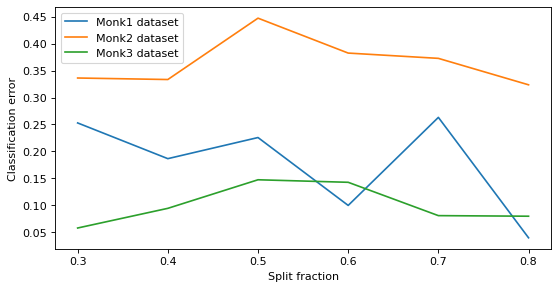

In [87]:
figure(num=None, figsize=(8, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(fractions,list1,label='Monk1 dataset')
plt.plot(fractions,list2,label='Monk2 dataset')
plt.plot(fractions,list3,label='Monk3 dataset')
plt.legend()
plt.xlabel("Split fraction")
plt.ylabel("Classification error")
plt.show()

**Reasonable statistics includes mean and a measure
of the spread.**

# ...???